# Building and training the model with pycaret

In [1]:
# import the necessary packages

import pandas as pd
import numpy as np
from pycaret.classification import *

In [2]:
!pip install openpyxl

In [2]:
# load the dataset

df_historical = pd.read_excel('C:/Users/marce/Desktop/Python/pythoncheatsheets/python_projects/Lead_scoring/archive/Lead_Scoring_cleaned.xlsx')

df_historical.head()

,Prospect_ID,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,Search,Get_updates_on_DM_Content,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5,674,2.5,Email Opened,Select,No,No,Select,No,No,Email Opened
1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,Email Opened,Business Administration,No,No,Mumbai,No,Yes,Email Opened
2,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,Unreachable,Media and Advertising,No,No,Mumbai,No,No,Modified
3,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2,1428,1.0,Converted to Lead,Select,No,No,Mumbai,No,No,Modified
4,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,No,1,2,1640,2.0,Email Opened,Supply Chain Management,No,No,Mumbai,No,No,Modified


In [3]:
df_historical.columns

Index(['Prospect_ID', 'Lead_Origin', 'Lead_Source', 'Do_Not_Email',
       'Do_Not_Call', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Specialization', 'Search', 'Get_updates_on_DM_Content', 'City',
       'I_agree_to_pay_the_amount_through_cheque',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

### Building the model with pycaret

In [5]:
# initialize setup

exp_1 = setup(data = df_historical,  target = 'Converted', session_id=123, 
              ignore_features=['Prospect_ID'], bin_numeric_features=['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit'],
             normalize=True, remove_multicollinearity=True, use_gpu=True)

,Description,Value
0,session_id,123
1,Target,Converted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5673, 17)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model = compare_models(n_select=5, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7945,0.8610,0.7101,0.7496,0.7286,0.5636,0.5648,0.0880
ada,Ada Boost Classifier,0.7912,0.8603,0.7114,0.7421,0.7260,0.5576,0.5583,0.1860
gbc,Gradient Boosting Classifier,0.7877,0.8589,0.7011,0.7403,0.7195,0.5491,0.5502,0.4740
lda,Linear Discriminant Analysis,0.7897,0.8589,0.7250,0.7326,0.7281,0.5568,0.5575,0.0720
catboost,CatBoost Classifier,0.7809,0.8551,0.7024,0.7263,0.7133,0.5362,0.5372,1.8770
lightgbm,Light Gradient Boosting Machine,0.7794,0.8471,0.7088,0.7207,0.7141,0.5346,0.5353,0.8040
xgboost,Extreme Gradient Boosting,0.7786,0.8437,0.6991,0.7233,0.7104,0.5314,0.5322,1.3190
rf,Random Forest Classifier,0.7673,0.8305,0.6687,0.7153,0.6906,0.5046,0.5058,0.5350
et,Extra Trees Classifier,0.7645,0.8152,0.6622,0.7128,0.6863,0.4983,0.4994,0.5580
nb,Naive Bayes,0.6618,0.8019,0.2013,0.7402,0.3006,0.1769,0.2416,0.0150


## Create Model (Logistic Regression)

In [7]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8116,0.8648,0.7419,0.7667,0.7541,0.6014,0.6016
1,0.7909,0.8494,0.7273,0.7320,0.7296,0.5592,0.5592
2,0.7960,0.8607,0.7468,0.7325,0.7395,0.5719,0.5719
3,0.8010,0.8698,0.6883,0.7737,0.7285,0.5723,0.5747
4,0.8010,0.8693,0.7662,0.7329,0.7492,0.5844,0.5848
5,0.8262,0.9029,0.7143,0.8148,0.7612,0.6255,0.6289
6,0.7960,0.8569,0.7290,0.7434,0.7362,0.5699,0.5699
7,0.7783,0.8471,0.6774,0.7343,0.7047,0.5277,0.5288
8,0.7683,0.8524,0.6387,0.7333,0.6828,0.5016,0.5046
9,0.7758,0.8364,0.6710,0.7324,0.7003,0.5218,0.5231


## Fine Tuning the Logistic Regression Model

In [9]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8090,0.8635,0.7419,0.7616,0.7516,0.5966,0.5967
1,0.7909,0.8484,0.7273,0.7320,0.7296,0.5592,0.5592
2,0.7985,0.8605,0.7532,0.7342,0.7436,0.5777,0.5778
3,0.8010,0.8680,0.6883,0.7737,0.7285,0.5723,0.5747
4,0.7985,0.8692,0.7662,0.7284,0.7468,0.5796,0.5802
5,0.8262,0.9014,0.7078,0.8195,0.7596,0.6246,0.6287
6,0.7909,0.8567,0.7226,0.7368,0.7296,0.5592,0.5593
7,0.7809,0.8466,0.6839,0.7361,0.7090,0.5337,0.5346
8,0.7708,0.8529,0.6387,0.7388,0.6851,0.5064,0.5097
9,0.7758,0.8363,0.6710,0.7324,0.7003,0.5218,0.5231


## Create and testing an Ensemble Model of Logistic Regression

In [8]:
bagged_lr = ensemble_model(lr, method='Bagging', round=2, choose_better=True, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.82,0.86,0.75,0.77,0.76,0.62,0.62
1,0.78,0.85,0.71,0.72,0.72,0.54,0.54
2,0.80,0.86,0.74,0.74,0.74,0.57,0.57
3,0.80,0.87,0.69,0.76,0.73,0.57,0.57
4,0.80,0.87,0.76,0.73,0.75,0.58,0.58
5,0.82,0.90,0.71,0.81,0.75,0.61,0.62
6,0.79,0.85,0.72,0.74,0.73,0.56,0.56
7,0.77,0.85,0.68,0.72,0.70,0.52,0.52
8,0.77,0.85,0.65,0.73,0.68,0.50,0.51
9,0.77,0.83,0.66,0.72,0.69,0.50,0.50


## Plot Model

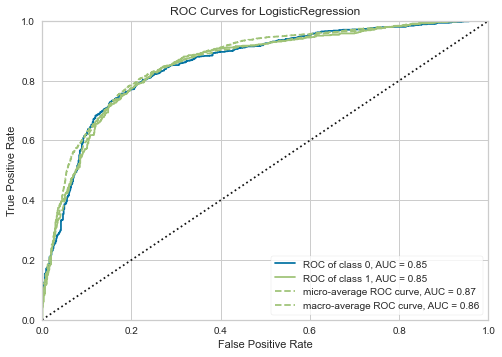

In [9]:
# Plot the model based on AUC

plot_model(bagged_lr, plot='auc')

## Evaluate Model

In [10]:
from pycaret.classification import *

evaluate_model(bagged_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Observation about the model**

 Looking at the feature importance of the model, Total Time Spent on Website, DO not email, Last Activity, Lead Source, are the key factors that define the success of a conversion, therefore we will create a new column witht the lead scoring of Hot Lead or Cold lead

## Predict the Model on Test Data

In [11]:
test_pred = predict_model(bagged_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7920,0.8548,0.6873,0.7558,0.7199,0.5551,0.5567


In [12]:
test_pred.head(10)

,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,...,Page_Views_Per_Visit_3.0,Page_Views_Per_Visit_4.0,Page_Views_Per_Visit_5.0,Page_Views_Per_Visit_6.0,Page_Views_Per_Visit_7.0,Page_Views_Per_Visit_8.0,Page_Views_Per_Visit_9.0,Converted,Label,Score
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9093
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8802
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8736
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6211
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.6904
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.5835
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8729
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8138
8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7604
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6494


## Finalize Model Bagged_lr

In [13]:
final_bagged_lr = finalize_model(bagged_lr)

In [14]:
## Predict again on test data

final_pred_test_historical = predict_model(final_bagged_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8102,0.8665,0.7266,0.7721,0.7486,0.5964,0.5971


In [15]:
final_pred_test_historical 

,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,...,Page_Views_Per_Visit_3.0,Page_Views_Per_Visit_4.0,Page_Views_Per_Visit_5.0,Page_Views_Per_Visit_6.0,Page_Views_Per_Visit_7.0,Page_Views_Per_Visit_8.0,Page_Views_Per_Visit_9.0,Converted,Label,Score
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9318
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8760
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8655
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6275
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.7107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6797
1698,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9668
1699,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8674
1700,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.9340


In [16]:
## Check the parameters of the final model

print(final_bagged_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Predict the model on unseen data file: Lead_new excel file

In [17]:
# Import the unseen data csv file

unseen_data = pd.read_excel('C:/Users/marce/Desktop/Python/pythoncheatsheets/python_projects/Lead_scoring/archive/Lead_new.xlsx')

unseen_data

,Prospect_ID,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,Search,Get_updates_on_DM_Content,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,f47be9f2-d8c5-4699-baab-006ccd38a8e0,Landing Page Submission,Organic Search,No,No,10,1337,5.00,Email Opened,Business Administration,No,No,Other Cities,No,Yes,Email Opened
1,aac1f048-f739-4db8-a1bb-aa3165155a2b,API,Olark Chat,No,No,5,1296,2.50,Olark Chat Conversation,Finance Management,No,No,Other Cities,No,No,Olark Chat Conversation
2,f9402e24-c60f-4b34-ae77-1e9fdbcd066e,Landing Page Submission,Organic Search,No,No,4,1390,4.00,Email Opened,Marketing Management,No,No,Mumbai,No,Yes,Email Opened
3,124008b3-534c-43da-8162-0c44a9647629,API,Google,No,No,2,1647,2.00,SMS Sent,Select,No,No,Select,No,No,SMS Sent
4,d0694c4f-1747-4065-9c5b-74baa1f9ab82,API,Olark Chat,No,No,11,1882,2.75,Email Opened,Select,Yes,No,Select,No,No,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,No,8,1845,2.67,Email Marked Spam,IT Projects Management,No,No,Mumbai,No,No,Email Marked Spam
496,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,No,2,238,2.00,SMS Sent,Media and Advertising,No,No,Mumbai,No,Yes,SMS Sent
497,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,No,2,199,2.00,SMS Sent,Business Administration,No,No,Mumbai,No,Yes,SMS Sent
498,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,No,3,499,3.00,SMS Sent,Human Resource Management,No,No,Other Metro Cities,No,No,SMS Sent


In [18]:
## unseen_predictions

unseen_predictions_new = predict_model(final_bagged_lr, data=unseen_data)

unseen_predictions_new.head(5)

,Prospect_ID,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,Search,Get_updates_on_DM_Content,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity,Label,Score
0,f47be9f2-d8c5-4699-baab-006ccd38a8e0,Landing Page Submission,Organic Search,No,No,10,1337,5.00,Email Opened,Business Administration,No,No,Other Cities,No,Yes,Email Opened,1,0.6624
1,aac1f048-f739-4db8-a1bb-aa3165155a2b,API,Olark Chat,No,No,5,1296,2.50,Olark Chat Conversation,Finance Management,No,No,Other Cities,No,No,Olark Chat Conversation,1,0.5747
2,f9402e24-c60f-4b34-ae77-1e9fdbcd066e,Landing Page Submission,Organic Search,No,No,4,1390,4.00,Email Opened,Marketing Management,No,No,Mumbai,No,Yes,Email Opened,1,0.5785
3,124008b3-534c-43da-8162-0c44a9647629,API,Google,No,No,2,1647,2.00,SMS Sent,Select,No,No,Select,No,No,SMS Sent,1,0.8223
4,d0694c4f-1747-4065-9c5b-74baa1f9ab82,API,Olark Chat,No,No,11,1882,2.75,Email Opened,Select,Yes,No,Select,No,No,Email Opened,1,0.5219


## Define the Lead Scoring (Hot Lead/Cold Lead, based on Total Time spent on visit)

In [19]:
# Create the scoring lead for the new unseen data and drop the Label column (Predicted Column) on the new data

unseen_predictions_new_BI = unseen_predictions_new.copy()

In [21]:
# so the parameters to score the leads between hot and cold are: Total time Spent on Site >= 600


unseen_predictions_new_BI['Lead_Score'] = np.where(unseen_predictions_new_BI['Total_Time_Spent_on_Website'] >= 600, 'Hot', 'Cold')

In [22]:
unseen_predictions_new_BI.head()

,Prospect_ID,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,Search,Get_updates_on_DM_Content,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity,Label,Score,Lead_Score
0,f47be9f2-d8c5-4699-baab-006ccd38a8e0,Landing Page Submission,Organic Search,No,No,10,1337,5.00,Email Opened,Business Administration,No,No,Other Cities,No,Yes,Email Opened,1,0.6624,Hot
1,aac1f048-f739-4db8-a1bb-aa3165155a2b,API,Olark Chat,No,No,5,1296,2.50,Olark Chat Conversation,Finance Management,No,No,Other Cities,No,No,Olark Chat Conversation,1,0.5747,Hot
2,f9402e24-c60f-4b34-ae77-1e9fdbcd066e,Landing Page Submission,Organic Search,No,No,4,1390,4.00,Email Opened,Marketing Management,No,No,Mumbai,No,Yes,Email Opened,1,0.5785,Hot
3,124008b3-534c-43da-8162-0c44a9647629,API,Google,No,No,2,1647,2.00,SMS Sent,Select,No,No,Select,No,No,SMS Sent,1,0.8223,Hot
4,d0694c4f-1747-4065-9c5b-74baa1f9ab82,API,Olark Chat,No,No,11,1882,2.75,Email Opened,Select,Yes,No,Select,No,No,Email Opened,1,0.5219,Hot


In [23]:
# now we clean the dataset before saving it into an excel and sql file: drop the column label not useful for our dashboard, 
# we raname 'Score' column into 'Pred_Prob' and the 'Lead_Score' into Lead_Category

unseen_predictions_new_BI.drop(columns='Label', inplace=True, axis=1)

In [24]:
unseen_predictions_new_BI.rename(columns={'Score': 'ML_Pred_Proba'}, inplace=True)

In [25]:
unseen_predictions_new_BI.rename(columns={'Lead_Score': 'Lead_Category'}, inplace=True)

In [26]:
unseen_predictions_new_BI.head()

,Prospect_ID,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,Search,Get_updates_on_DM_Content,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity,ML_Pred_Proba,Lead_Category
0,f47be9f2-d8c5-4699-baab-006ccd38a8e0,Landing Page Submission,Organic Search,No,No,10,1337,5.00,Email Opened,Business Administration,No,No,Other Cities,No,Yes,Email Opened,0.6624,Hot
1,aac1f048-f739-4db8-a1bb-aa3165155a2b,API,Olark Chat,No,No,5,1296,2.50,Olark Chat Conversation,Finance Management,No,No,Other Cities,No,No,Olark Chat Conversation,0.5747,Hot
2,f9402e24-c60f-4b34-ae77-1e9fdbcd066e,Landing Page Submission,Organic Search,No,No,4,1390,4.00,Email Opened,Marketing Management,No,No,Mumbai,No,Yes,Email Opened,0.5785,Hot
3,124008b3-534c-43da-8162-0c44a9647629,API,Google,No,No,2,1647,2.00,SMS Sent,Select,No,No,Select,No,No,SMS Sent,0.8223,Hot
4,d0694c4f-1747-4065-9c5b-74baa1f9ab82,API,Olark Chat,No,No,11,1882,2.75,Email Opened,Select,Yes,No,Select,No,No,Email Opened,0.5219,Hot


## save the data for PowerBI in Excel and SQL

In [27]:
unseen_predictions_new_BI.to_excel('new_leads_BI.xlsx', index=None)

In [28]:
## save the prediction Model for deployment 

save_model(final_bagged_lr,'Final_Bagged_L_Regre_12Feb2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Prospect_ID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Converted',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=No...
                                        target_variable='Converted',
                                        threshold=0.9)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0,